**Q1**

Multiplications: n\*m\*k
As the matrices are of order (n,k) & (k,m), the product will be of order (n,m). Means there are n\*m elements in total. Each element have k products, so total products are n*m*k.

Addition: n\*m\*(k-1)
Similarly as there are n\*m elements and there are k-1 additions in each element. So in total there are n*m*(k-1) additions involved.

**Q2**

Python code to multiply the above two matrices - 

In [12]:
import numpy as np
import time
A = np.random.randint(0,10,size=(8,5))
B = np.random.randint(0,10,size=(5,7))
n = len(A)
m = len(B[0])

s1 = time.perf_counter()
mul1=[]
for i in range(n):
    lst = []
    for j in range(m):
        element = 0
        for k in range(len(A[0])):
            element+=A[i][k]*B[k][j]
        lst.append(element)
    mul1.append(lst)
e1 = time.perf_counter()
print(mul1)

s2 = time.perf_counter()
A = np.array(A)
B  = np.array(B)
mul2 = np.dot(A,B)
e2 = time.perf_counter()
print(mul2)

print("time taken by using list of lists is",e1-s1)
print("time taken by using numpy is",e2-s2)

[[117, 169, 115, 162, 132, 100, 115], [130, 182, 149, 175, 111, 110, 131], [70, 135, 67, 133, 85, 69, 105], [140, 116, 96, 149, 110, 99, 116], [149, 162, 110, 163, 87, 125, 112], [143, 172, 84, 173, 103, 126, 118], [131, 180, 128, 189, 151, 106, 146], [134, 200, 121, 188, 141, 120, 131]]
[[117 169 115 162 132 100 115]
 [130 182 149 175 111 110 131]
 [ 70 135  67 133  85  69 105]
 [140 116  96 149 110  99 116]
 [149 162 110 163  87 125 112]
 [143 172  84 173 103 126 118]
 [131 180 128 189 151 106 146]
 [134 200 121 188 141 120 131]]
time taken by using list of lists is 0.0016133000026457012
time taken by using numpy is 0.00023090001195669174


Here we can see that numpy method takes less time as compared to the list method. So, numpy is faster than the list of list method. The reason fo that is that numpy allows operations on vectors, which makes it faster than on doing operation on every element. Along with that it also uses parallel processing and can do multiple operations at a same time.

**Q3**

The time of the given method is O(N^2)
To improve the time complexity, we can first sort the array and then find the median. The time complexity in this case will be O(NlogN).

Below is the code for that

In [10]:
import numpy as np
import time
M = np.random.randint(1,1000000,size=100);
print(M)
M_numpy = np.array(M)

n = len(M)
m = M.copy()
s1 = time.perf_counter()
if n%2==0:
    k = n//2
    for i in range (0,k+1):
        maxi = m[0]
        index=0
        for j in range (1,n) :
            if maxi<m[j]:
                maxi = m[j]
                index = j
        if i<k-1:
            m[index]=0
        elif i==k-1:
            first = m[index]
            m[index]=0
        else:
            second = m[index]
    median1 = (first+second)/2

else:
    k = n//2
    for i in range (0,k+1):
        maxi = m[0]
        index=0
        for j in range (1,n) :
            if maxi<m[j]:
                maxi = m[j]
                index = j 
        if i<k:
            m[index]=0
        else:
            median1 = m[index]  
e1 = time.perf_counter()
print("median using given method is:",median1)
print("and the time taken is",e1-s1,"\n")

s2 = time.perf_counter()
M.sort()
if(n%2==0):
    median2 = (M[n//2]+M[(n//2)-1])/2
else:
    median2 = M[n//2]
e2 = time.perf_counter()
print("median using optimal method is: ",median2)
print("and the time taken is",e2-s2,"\n")

s3 = time.perf_counter()
median3 = np.median(M_numpy)
e3 = time.perf_counter()
print("median using numpy method is: ",median3)
print("and the time taken is",e3-s3,"\n")

[190576 612762 539385 341494 880622 390775 120471 136302 742752  68435
 643291 962128 396238 906693 565426 411531 130653 479285 910146 732706
 964942 250827  26419 399617 764079 804882  57571 519265 726018 173237
 640309 279487 985882 952569 255352 182267 145291 612963 998722 460811
 604057 510956 525847 755419 300649 735597 771620 969169 402985 879588
 478817 288192 586770 859895 911324 708365  46391 303411 383916 234287
 603927 887833 822718 147954  34626 207297  79600  49442 818325 275161
 982803 471814 727273 623006 862044 725393 570432 812246 920321 213326
 127228  10021 516245 310835 704134 315420 837566 199908 446762 569955
 899040 585400  80828 945778 994233 905404 962229  34931 259440 358413]
median using given method is: 532616.0
and the time taken is 0.003837500000372529 

median using optimal method is:  532616.0
and the time taken is 0.000622499966993928 

median using numpy method is:  532616.0
and the time taken is 0.0004008000250905752 



Time complexity of the numpy method is least for larger values

**Q4**

The gradient of given function with respect to x is : 2xy + y^3.cos(x)

and with respect to y, it is : x^2 + 3y^2.sin(x)


**Q5**

Below is the code using JAX

In [15]:
import jax
import jax.numpy as jnp

def func(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

grd = jax.grad(func, argnums=(0, 1))

values = [(5.0,7.0),(2.0,6.0)]

analytical_sol=[]
using_jax = []

for x,y  in values:
    analytical = (2*x*y + y**3 * jnp.cos(x), x**2 + 3*y**2 * jnp.sin(x))
    jax_method = grd(x, y)
    analytical_sol.append(analytical)
    using_jax.append(jax_method)
    
print("Analytical gradients are :",analytical_sol,"\n")
print("jax gradients are :",using_jax)

Analytical gradients are : [(Array(167.29614, dtype=float32, weak_type=True), Array(-115.96187, dtype=float32, weak_type=True)), (Array(-65.88772, dtype=float32, weak_type=True), Array(102.20412, dtype=float32, weak_type=True))] 

jax gradients are : [(Array(167.29614, dtype=float32, weak_type=True), Array(-115.96187, dtype=float32, weak_type=True)), (Array(-65.88772, dtype=float32, weak_type=True), Array(102.20412, dtype=float32, weak_type=True))]


**Q6**

Below is the code for confirming analytical solution using sympy

In [22]:
import sympy as sp

x, y = sp.symbols('x y')
func = x**2 * y + y**3 * sp.sin(x)

x_grd = sp.diff(func, x)
y_grd = sp.diff(func, y)

x_grd,y_grd

(2*x*y + y**3*cos(x), x**2 + 3*y**2*sin(x))

**Q7**

Below is the nested dictionary to store  hierarchical information

In [37]:
marks_1 = {"Maths":100,"English":70}
roll_no_1 = {"Number":1,"Name":"N","Marks":marks_1}
branch1_2022 = {"Roll Number 1":roll_no_1}
branch2_2022 = {}
branch1_2023 = {}
branch2_2023 = {}
branch1_2024 = {}
branch2_2024 = {}
branch1_2025 = {}
branch2_2025 = {}
records = {
    2022:{"Branch 1":branch1_2022,"Branch 2":branch2_2022}, 2023:{"Branch 1":branch1_2023,"Branch 2": branch2_2023},
    2024:{"Branch 1":branch1_2024,"Branch 2":branch2_2024}, 2025:{"Branch 1":branch1_2025,"Branch 2":branch2_2025}
}
print(records)

{2022: {'Branch 1': {'Roll Number 1': {'Number': 1, 'Name': 'N', 'Marks': {'Maths': 100, 'English': 70}}}, 'Branch 2': {}}, 2023: {'Branch 1': {}, 'Branch 2': {}}, 2024: {'Branch 1': {}, 'Branch 2': {}}, 2025: {'Branch 1': {}, 'Branch 2': {}}}


**Q8**

Storing the same information using Python classes - 

In [ ]:
class records:
    def __init__(self):
        self.years = []
    def yr(self, year):
        self.years.append(year)

class year:
    def __init__(self, year):
        self.year = year
        self.branches = []
    def branch_new(self, branch):
        self.branches.append(branch)
    
class branch:
    def __init__(self, name):
        self.name = name
        self.students = []
    def student_new(self, student):
        self.students.append(student)

class student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks
        
class marks:
    def __init__(self, maths, english):
        self.maths = maths
        self.english = english

marks1 = marks(100, 70)
student1 = student(1, "N", marks_1)
branch1_2022 = branch("Branch 1")
branch1_2022.student_new(student1)

branch2_2022 = branch("Branch 2")
branch1_2023 = branch("Branch 1")
branch2_2023 = branch("Branch 2")
branch1_2024 = branch("Branch 1")
branch2_2024 = branch("Branch 2")
branch1_2025 = branch("Branch 1")
branch2_2025 = branch("Branch 2")

yr2022 = year(2022)
yr2022.branch_new(branch1_2022)
yr2022.branch_new(branch2_2022)
yr2023 = year(2023)
yr2023.branch_new(branch1_2023)
yr2023.branch_new(branch2_2023)
yr2024 = year(2024)
yr2024.branch_new(branch1_2024)
yr2024.branch_new(branch2_2024)
yr2025 = year(2025)
yr2025.branch_new(branch1_2025)
yr2025.branch_new(branch2_2025)

records = records()
records.yr(yr2022)
records.yr(yr2023)
records.yr(yr2024)
records.yr(yr2025)
print(records)

**Q9**

Plotting of the given functions using matplotlib - 

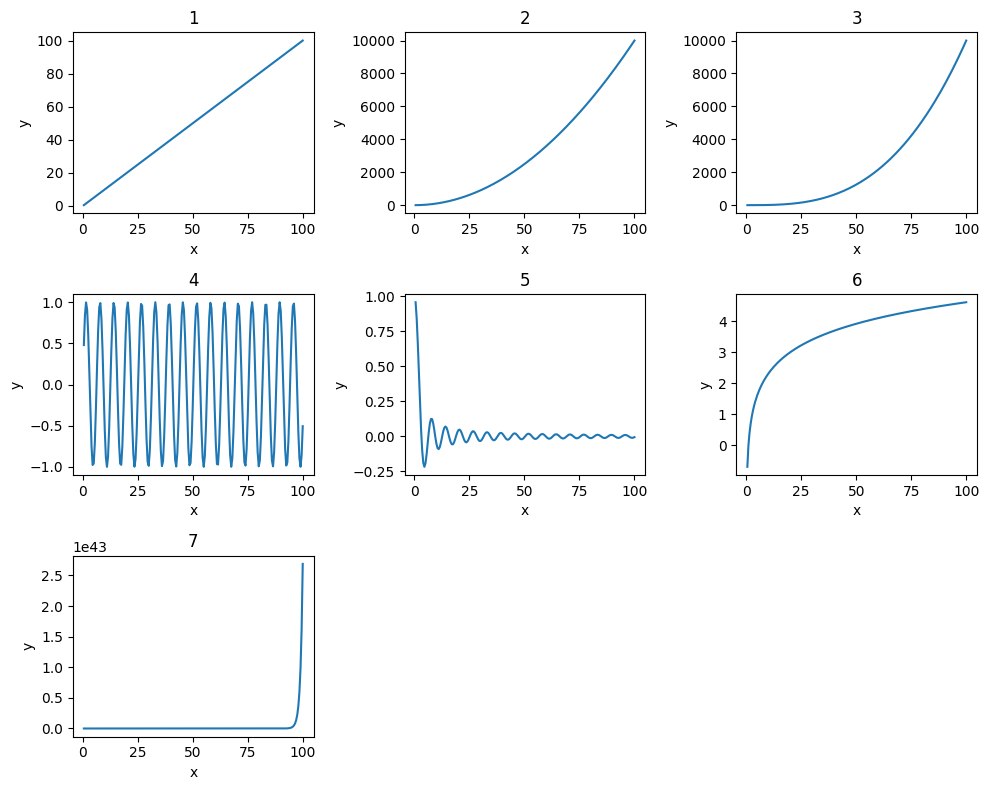

In [23]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0.5, 100.5, 0.5)
f1 = x
f2 = x**2
f3 = (x**3)/100
f4 = np.sin(x) 
f5 = np.sin(x)/x  
f6 = np.log(x)
f7 = np.exp(x)

plt.figure(figsize=(10, 8))
plt.subplot(3, 3, 1)
plt.plot(x, f1)
plt.title('1')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(3, 3, 2)
plt.plot(x, f2)
plt.title('2')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(3, 3, 3)
plt.plot(x, f3)
plt.title('3')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(3, 3, 4)
plt.plot(x, f4)
plt.title('4')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(3, 3, 5)
plt.plot(x, f5)
plt.title('5')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(3, 3, 6)
plt.plot(x, f6)
plt.title('6')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(3, 3, 7)
plt.plot(x, f7)
plt.title('7')
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()

**Q 10**

Below is the code for the required dataframe

In [13]:
import numpy as np
import pandas as pd

M = np.random.uniform(1, 2, size=(20, 5))
col = ["a", "b", "c", "d", "e"]
df = pd.DataFrame(M, columns=col)
print("Dataframe is :",df,"\n")

standard_deviation = df.std()
highest_sd = standard_deviation.idxmax()
print("The column with the highest standard deviation is :",highest_sd)

means = df.mean(axis=1)
lowest_mean = means.idxmin()
print("The row with the lowest mean is :",lowest_mean)

Dataframe is :            a         b         c         d         e
0   1.541485  1.055473  1.436422  1.874776  1.952514
1   1.696920  1.293342  1.695940  1.084585  1.410026
2   1.269570  1.072682  1.437871  1.692579  1.384440
3   1.502609  1.574987  1.394518  1.778636  1.103459
4   1.848109  1.996491  1.838792  1.671071  1.703766
5   1.839658  1.308247  1.393158  1.819825  1.422625
6   1.849738  1.038004  1.266731  1.151613  1.273254
7   1.881018  1.963008  1.552812  1.350511  1.269264
8   1.388285  1.582555  1.772379  1.718046  1.993663
9   1.015562  1.904931  1.861330  1.361683  1.813380
10  1.990157  1.973761  1.048638  1.879509  1.197660
11  1.741443  1.428905  1.014213  1.718187  1.126262
12  1.869087  1.366813  1.147349  1.700674  1.918786
13  1.747980  1.244045  1.135407  1.361226  1.568414
14  1.115331  1.930210  1.762775  1.203008  1.229835
15  1.224489  1.392023  1.870700  1.198207  1.821512
16  1.250580  1.074733  1.665672  1.719467  1.736026
17  1.866711  1.081689  1.85993

**Q11**

Doing the given changes in the dataframe - 

In [14]:
df['f'] = df.sum(axis=1)
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')
num = df[df['g'] == 'LT8'].shape[0]
print("The number of rows in the dataframe where the value in the column g is LT8 :",num)

sd_LT8 = df[df['g'] == 'LT8']['f'].std()
print("Standard deviation of the column f for the rows where the value in the column d is LT8 is :",sd_LT8)

sd_GT8 = df[df['g'] == 'GT8']['f'].std()
print("Standard deviation of the column f for the rows where the value in the column d is GT8 is :",sd_GT8)

The number of rows in the dataframe where the value in the column g is LT8 : 14
Standard deviation of the column f for the rows where the value in the column d is LT8 is : 0.41594773521337425
Standard deviation of the column f for the rows where the value in the column d is GT8 is : 0.408377901045452


**Q12**

Broadcasting in numpy allows us to perform operations such as addition/multiplication on matrices with different dimensions. It makes the matrices compatible for the operation. An example is shown below in which matrix  is of dimensions (3,3) and matrix B is of (1,3), But they can be added in numpy using broadcasting. As shown below - 

In [18]:
import numpy as np
A = np.array([[3,6,2],[9,3,7],[6,2,9]])
B = np.array([[7,1,0]])

ans = A+B
print(ans)

[[10  7  2]
 [16  4  7]
 [13  3  9]]


**Q13**

Below is the code for find argmin in a numpy array - 

In [23]:
import numpy as np
arr = np.array([34,7,6,4,345,6,56,5,3,4,56])

min1 = arr[0]
index1 = 0
for i in range(1,len(arr)):
    if(arr[i]<min1):
        min1 = arr[i]
        index1 = i      
index2 = np.argmin(arr)

if(index1==index2):
    print("We got correct minimum index as :", index1)
else:
    print("Didn't got correct minimum index")

We got correct minimum index as : 8
